In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from collections import Counter
from numpy import unique
from numpy import reshape
from sklearn.model_selection import train_test_split
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
path = r'E:/Data Sets'
df = pd.read_csv(os.path.join(path, 'Task-2.2-revised-data.csv'))
df1 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [14]:
df = df.loc[:3652,:]
df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,MUNCHENB_pressure,KASSEL_cloud_cover,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1.0304,8,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1.0292,6,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,1.0320,8,0.69
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,1.0443,6,0.98
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,1.0430,7,0.96


In [10]:
df1 = df1[df1['DATE'].astype(str).str.contains('196')]
df1.drop(columns = ['DATE'], inplace = True)
df1.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.shape

(3653, 135)

In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df, df1, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


In [21]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [22]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5896032831737346


# Decision Trees

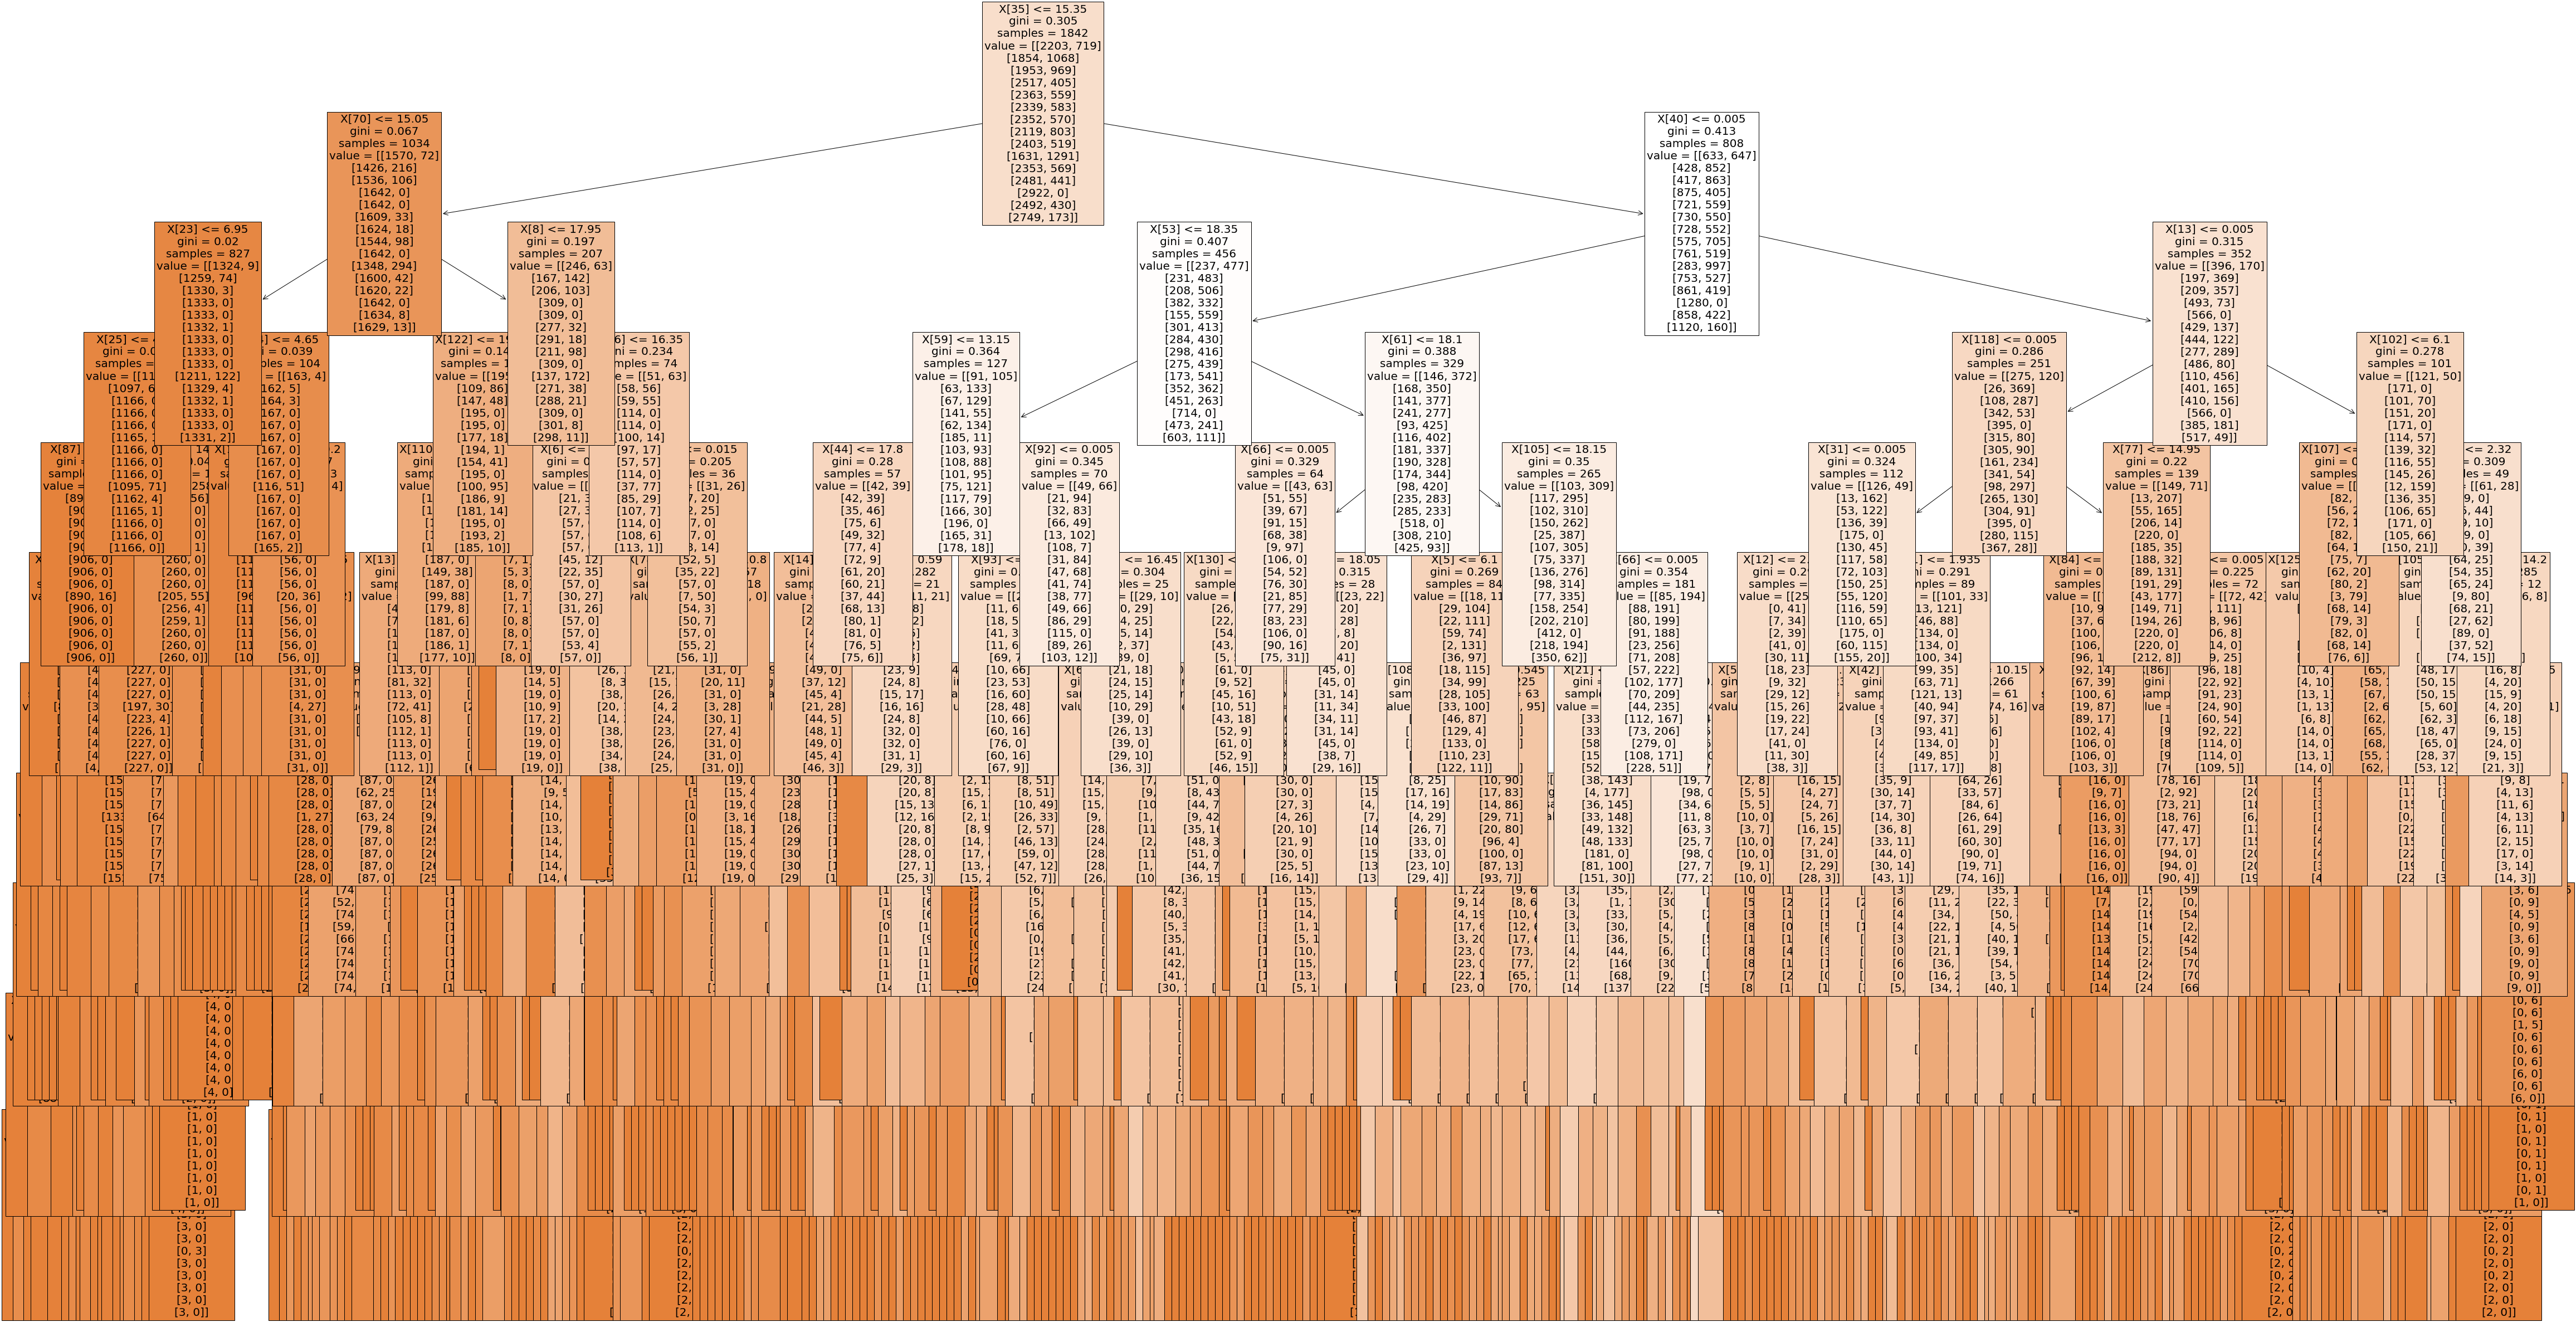

In [23]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [32]:
newarray = clf.feature_importances_
np.set_printoptions(threshold=1000)
newarray

array([0.0050747 , 0.00226512, 0.        , 0.00321063, 0.01659756,
       0.00755219, 0.02808502, 0.00518457, 0.02629132, 0.00247798,
       0.00307649, 0.00348493, 0.00471914, 0.019025  , 0.00306135,
       0.00520003, 0.00479396, 0.00672554, 0.        , 0.        ,
       0.        , 0.00829971, 0.01481612, 0.00416944, 0.01025823,
       0.00344734, 0.03227088, 0.00296141, 0.00215275, 0.00509745,
       0.00330436, 0.01328371, 0.00317474, 0.01443748, 0.00218627,
       0.02861876, 0.00420203, 0.00226082, 0.0003109 , 0.00269516,
       0.01896815, 0.00682592, 0.02939944, 0.00478204, 0.04420934,
       0.00173808, 0.00277851, 0.00370563, 0.0035688 , 0.00707855,
       0.00376323, 0.01378415, 0.00219772, 0.01041455, 0.00240796,
       0.00476669, 0.00342753, 0.01632671, 0.00435747, 0.02221553,
       0.00470245, 0.02391543, 0.00351258, 0.00331071, 0.00286028,
       0.00356026, 0.01805057, 0.00401918, 0.0115895 , 0.00195981,
       0.02787254, 0.00473492, 0.00284447, 0.00359825, 0.00367

In [40]:
newarray = newarray.reshape(-1,15,9)
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.0942611 , 0.05256441, 0.07326173, 0.07521693, 0.1136538 ,
       0.0490292 , 0.08563234, 0.07795776, 0.09404273, 0.06136162,
       0.07223661, 0.05692912, 0.02499343, 0.04229803, 0.02656118])

In [41]:
stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']
important = pd.Series(sumarray, index = stations).sort_values(ascending = False)
important

DUSSELDORF    0.113654
BASEL         0.094261
MAASTRICHT    0.094043
KASSEL        0.085632
LJUBLJANA     0.077958
DEBILT        0.075217
BUDAPEST      0.073262
MUNCHENB      0.072237
MADRID        0.061362
OSLO          0.056929
BELGRADE      0.052564
HEATHROW      0.049029
STOCKHOLM     0.042298
VALENTIA      0.026561
SONNBLICK     0.024993
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


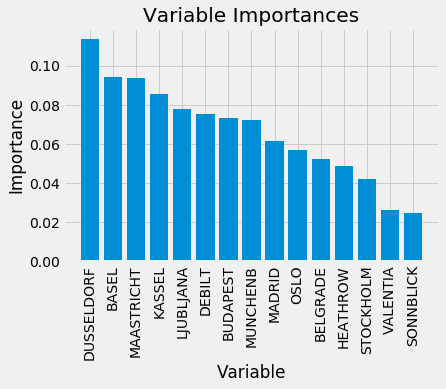

In [44]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');